# Loan-Prediction Analysis

Problem Statement:
Loans are the core business of banks. The main profit comes directly from the loan’s interest. The loan companies grant a loan after an intensive process of verification and validation. However, they still do not have assurance if the applicant is able to repay the loan with no difficulties. The two most critical questions in the lending industry are:

How risky is the borrower?
Given the borrower’s risk, should we lend him/her?
In the modern era, the data science teams in the banks build predictive models using machine learning to predict how likely a client is going to default the loan when they only have a handful of information. Loan Prediction is a very common real-life problem that each retail bank faces at least once in its lifetime. If done correctly, it can save a lot of man hours at the end of a retail bank.

# Importing Libraries

In [9]:
#for numerical operations
import numpy as np

#for dataframe operations
import pandas as pd

#for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# for machine learning algorithms
import sklearn

# Reading Dataset

In [10]:
df = pd.read_csv('loan_prediction.csv')

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
df.shape

(614, 13)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Checking the Missing Values 

In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Filling the Missing Values 

In [15]:
# Filling the Gender column with mode :
df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)

In [16]:
# Filling the Married Column with mode :
df['Married'].fillna(df['Married'].mode()[0],inplace = True)

In [17]:
# Filling the Dependents column with mode :
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace = True)

In [18]:
# Filling the Self_Employed column with mode :
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace = True)

In [19]:
# Filling the LoanAmount column with mode :
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace = True)

In [20]:
# Filling the Loan_Amount_Term column with mode :
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace = True)

In [21]:
# Filling the Loan_Amount_Term column with mode :
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace = True)

In [22]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# Exploratory Data Analysis 

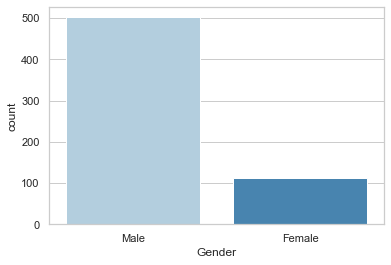

In [24]:
sns.countplot(data= df,x = 'Gender',palette = 'Blues')
plt.show()

Observation : The quantity of male Loan holders are quiet high as compared to females.

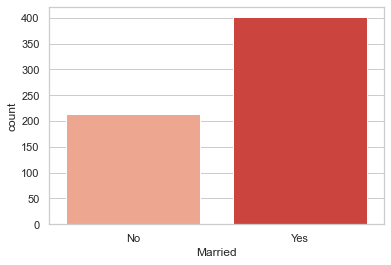

In [25]:
sns.countplot(data= df,x = 'Married',palette = 'Reds')
plt.show()

Observation : There are more Married Loan holders as compared to unmarried account holders.

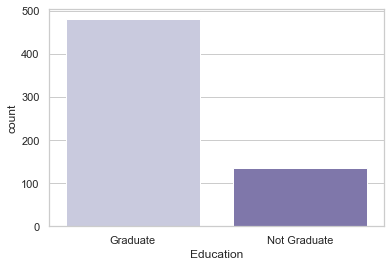

In [26]:
sns.countplot(data= df,x = 'Education',palette = 'Purples')
plt.show()

Observation : There are more Graduates Loan holders as compared to Not Graduates.

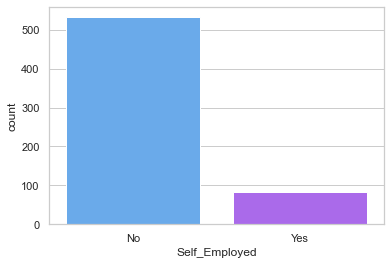

In [27]:
sns.countplot(data= df,x = 'Self_Employed',palette = 'cool')
plt.show()

Observation : Maximum Loan Holders are in some service , very few are self employed.

In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


<Figure size 720x720 with 0 Axes>

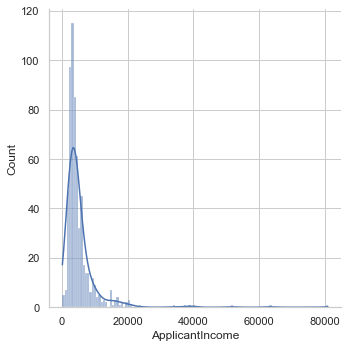

In [29]:
plt.figure(figsize = (10,10))
sns.displot(data = df,x = 'ApplicantIncome',kde = True)
plt.show()

The data doesnt follow the normal distribution. It is skewed to the right.

<Figure size 720x3600 with 0 Axes>

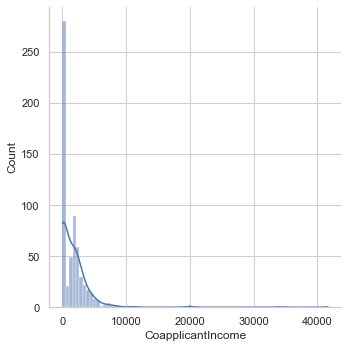

In [30]:
plt.figure(figsize = (10,50))
sns.displot(data = df,x = 'CoapplicantIncome',kde = True)
plt.show()

The data is skewed to the right.

In [31]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# Creation of new attributes 

In [32]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

<Figure size 720x720 with 0 Axes>

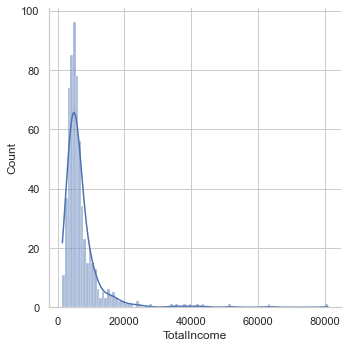

In [33]:
plt.figure(figsize = (10,10))
sns.displot(data = df,x = 'TotalIncome',kde = True)
plt.show()

# Correlation Matrix 

<AxesSubplot:>

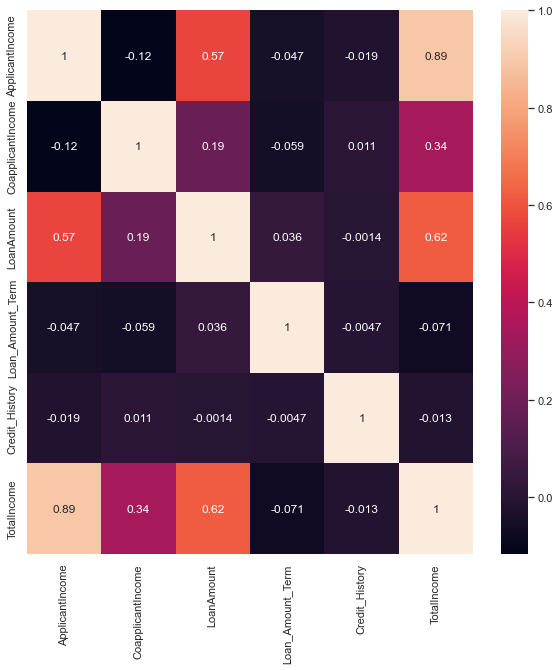

In [34]:
plt.figure(figsize = (10,10))
corr = df.corr()
sns.heatmap(corr,annot = True)

In [35]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [36]:
cols = ['Loan_ID','ApplicantIncome','CoapplicantIncome']
df = df.drop(columns = cols,axis = 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0


# Label Encoding 

In [37]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for col in cols:
  df[col] = le.fit_transform(df[col])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,128.000000,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,66.000000,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,120.000000,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,141.000000,360.0,1.0,2,1,6000.0


In [38]:
df['Dependents'] = df['Dependents'].replace('3+' , 3)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    int32  
 1   Married           614 non-null    int32  
 2   Dependents        614 non-null    object 
 3   Education         614 non-null    int32  
 4   Self_Employed     614 non-null    int32  
 5   LoanAmount        614 non-null    float64
 6   Loan_Amount_Term  614 non-null    float64
 7   Credit_History    614 non-null    float64
 8   Property_Area     614 non-null    int32  
 9   Loan_Status       614 non-null    int32  
 10  TotalIncome       614 non-null    float64
dtypes: float64(4), int32(6), object(1)
memory usage: 38.5+ KB


# Train Test Split 

In [40]:
from sklearn.model_selection import train_test_split
x = df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

# Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [43]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression()
model.fit(x_train , y_train)

predictions = model.predict(x_test)

predictions

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score
from sklearn.metrics import recall_score, precision_score

In [45]:
print(f'Accuracy Score: {accuracy_score(y_test,predictions)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, predictions)}')
print(f'Area Under Curve: {roc_auc_score(y_test, predictions)}')
print(f'Recall score: {recall_score(y_test,predictions)}')
print(f'Precision score: {precision_score(y_test,predictions)}')

Accuracy Score: 0.8292682926829268
Confusion Matrix: 
[[14 19]
 [ 2 88]]
Area Under Curve: 0.7010101010101011
Recall score: 0.9777777777777777
Precision score: 0.822429906542056


In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [48]:
classifier.score(x_test,y_test)

0.6504065040650406

In [49]:
classifier.score(x_train,y_train)

1.0

# Conclusion:

• Explored the dataset to understand the data.

• Perform different tests of statistical significance to uncover hidden data relationships that our predictive model could learn from and leverage when predicting unseen instances.

• Employed statistical analysis using various python libraries to identify the number and names of features that could more likely help in identifying the potential customers by predicting whether a loan would be approved or not.
